In [29]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [30]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()


In [31]:
x_train = x_train.astype('float32')
x_test = x_test.astype("float32")

In [40]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])




In [34]:
print(y_train[:10])



[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


In [41]:
model = keras.Sequential([
    data_augmentation,

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,
    epochs=30,           # increased from 10 → 30
    batch_size=64,
    validation_data=(x_test, y_test)
)


Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 64ms/step - accuracy: 0.2910 - loss: 1.9209 - val_accuracy: 0.3668 - val_loss: 1.9630
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 67ms/step - accuracy: 0.4153 - loss: 1.6046 - val_accuracy: 0.5095 - val_loss: 1.4173
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 67ms/step - accuracy: 0.4904 - loss: 1.4217 - val_accuracy: 0.5042 - val_loss: 1.3474
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 66ms/step - accuracy: 0.5384 - loss: 1.3098 - val_accuracy: 0.5330 - val_loss: 1.3820
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 68ms/step - accuracy: 0.5727 - loss: 1.2217 - val_accuracy: 0.6208 - val_loss: 1.1454
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 69ms/step - accuracy: 0.6010 - loss: 1.1528 - val_accuracy: 0.6021 - val_loss: 1.1723
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 66ms/step - accuracy: 0.6244 - loss: 1.0911 - val_accuracy: 0.6529 - val_loss: 1.0623
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 67ms/step - accuracy: 0.6434 - loss: 1.0408 - 

In [42]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8079 - loss: 0.5784
Test Accuracy: 0.8079000115394592


In [44]:

from sklearn.metrics import confusion_matrix
import numpy as np

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.reshape(-1)
cm = confusion_matrix(y_true, y_pred_classes)





313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


In [46]:
print(cm)

[[905  13  22   5   4   0   3   8  26  14]
 [ 10 940   1   0   0   0   2   0   3  44]
 [ 58   4 710  17  46  20 100  31   3  11]
 [ 34   5  56 550  50  88 110  51  24  32]
 [ 24   1  37  14 766   6 107  39   4   2]
 [ 11   6  35  76  44 659  73  71   5  20]
 [  6   3  18  16   7   3 931   3   3  10]
 [ 18   1  11  14  35  17  14 877   1  12]
 [ 99  15   7   2   2   1   8   1 851  14]
 [ 46  44   3   3   1   0   4   5   4 890]]


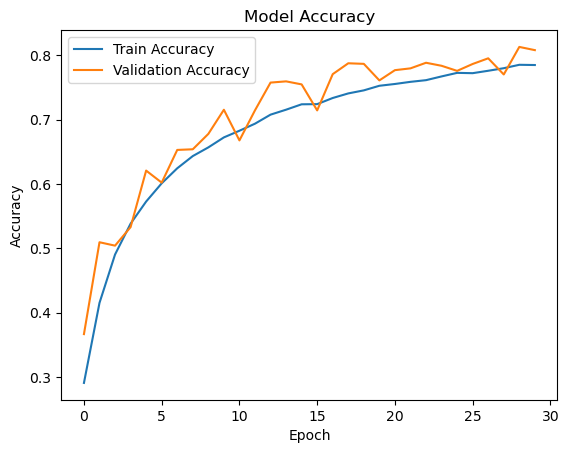

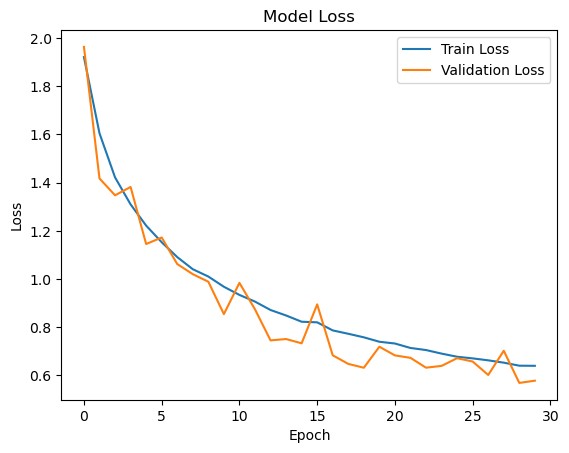

In [45]:
import matplotlib.pyplot as plt

# Accuracy Plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
